<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-19 10:50:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  62.2MB/s    in 3.2s    

2025-11-19 10:51:02 (62.9 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 155.1 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 138.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 173.6 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [8]:
QUERY = """
SELECT CompTotal FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)


       CompTotal
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
65432        NaN
65433        NaN
65434        NaN
65435        NaN
65436        NaN

[65437 rows x 1 columns]


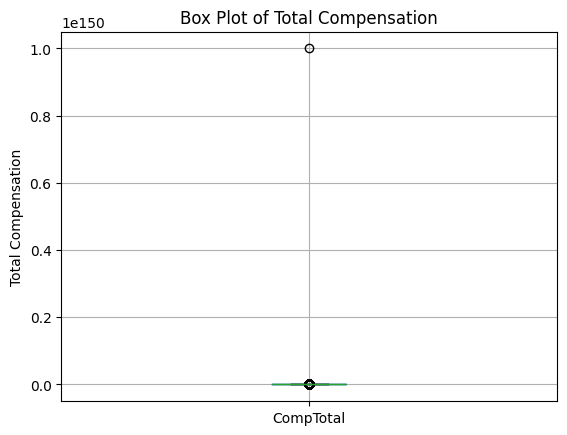

In [10]:
df.boxplot(column='CompTotal')
plt.title('Box Plot of Total Compensation')
plt.ylabel('Total Compensation')
plt.show()

In [9]:
#calculate Q1 and Q3
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#create a new DataFrame without outliers
df_cleaned = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

print("\nCleaned DataFrame (outliers removed from CompTotal):")
print(df_cleaned)


Cleaned DataFrame (outliers removed from CompTotal):
       CompTotal
374      28000.0
379      85000.0
385      50000.0
389     110000.0
392     126420.0
...          ...
65396    36000.0
65401    40000.0
65408    61000.0
65412    58000.0
65431    55000.0

[27864 rows x 1 columns]


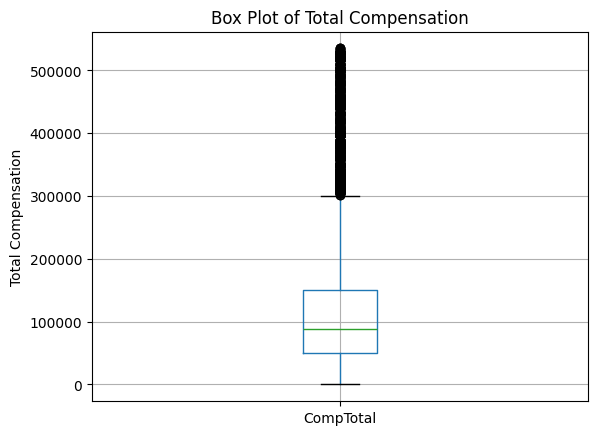

In [15]:
df_cleaned.boxplot()
plt.title('Box Plot of Total Compensation')
plt.ylabel('Total Compensation')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [10]:
QUERY = """
SELECT Age FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)


                      Age
0      Under 18 years old
1         35-44 years old
2         45-54 years old
3         18-24 years old
4         18-24 years old
...                   ...
65432     18-24 years old
65433     25-34 years old
65434     25-34 years old
65435     18-24 years old
65436     18-24 years old

[65437 rows x 1 columns]


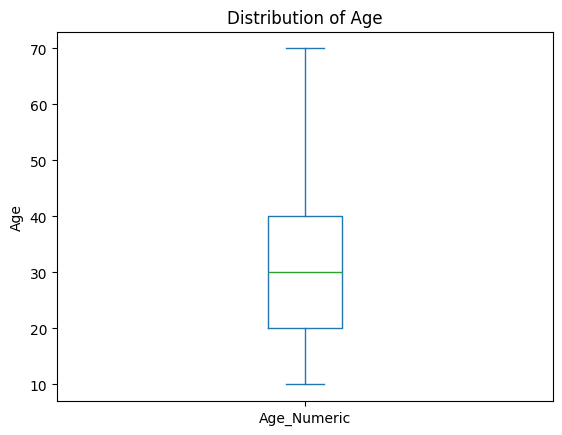

In [11]:
#Map the 'Age' column to approximate numeric values
#If 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#This can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#Drop rows with NaN in 'Age' for clean plotting (optional, depending on data)
df.dropna(subset=['Age_Numeric'], inplace=True)

#using DataFrame.plot.box() for a single column
df['Age_Numeric'].plot.box(title='Distribution of Age')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [15]:
QUERY = """
SELECT CompTotal, Age FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)


       CompTotal                 Age
0            NaN  Under 18 years old
1            NaN     35-44 years old
2            NaN     45-54 years old
3            NaN     18-24 years old
4            NaN     18-24 years old
...          ...                 ...
65432        NaN     18-24 years old
65433        NaN     25-34 years old
65434        NaN     25-34 years old
65435        NaN     18-24 years old
65436        NaN     18-24 years old

[65437 rows x 2 columns]


In [14]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)

print(f"Demo - Describing a Table:")
print(df.iat[0,0])

Demo - Describing a Table:
CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "Mis

In [13]:
#check unique value
print('\nThere are', df['CompTotal'].nunique(), 'unique CompTotal values in the survey:')
print(df['CompTotal'].value_counts())


There are 3337 unique CompTotal values in the survey:
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64


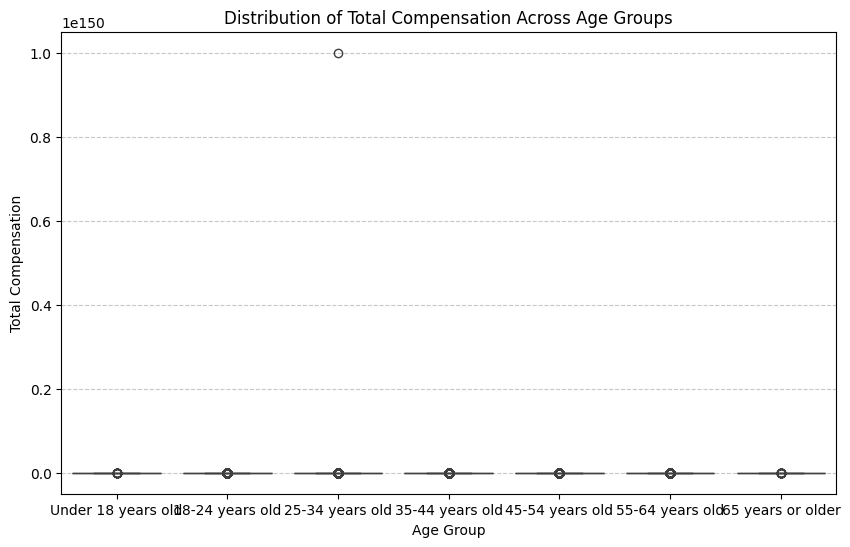

In [17]:
!pip install seaborn
import seaborn as sns

#Ensure 'Age' is treated as a categorical variable and ordered if desired
#For example, if you want a specific order for age groups:
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

#Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='CompTotal', data=df)
plt.title('Distribution of Total Compensation Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
#calculate Q1 and Q3
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#create a new DataFrame without outliers
df_cleaned2 = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

print("\nCleaned DataFrame (outliers removed from CompTotal):")
print(df_cleaned2)


Cleaned DataFrame (outliers removed from CompTotal):
       CompTotal              Age
374      28000.0  25-34 years old
379      85000.0  35-44 years old
385      50000.0  35-44 years old
389     110000.0  25-34 years old
392     126420.0  35-44 years old
...          ...              ...
65396    36000.0  18-24 years old
65401    40000.0  25-34 years old
65408    61000.0  25-34 years old
65412    58000.0  35-44 years old
65431    55000.0  45-54 years old

[27864 rows x 2 columns]


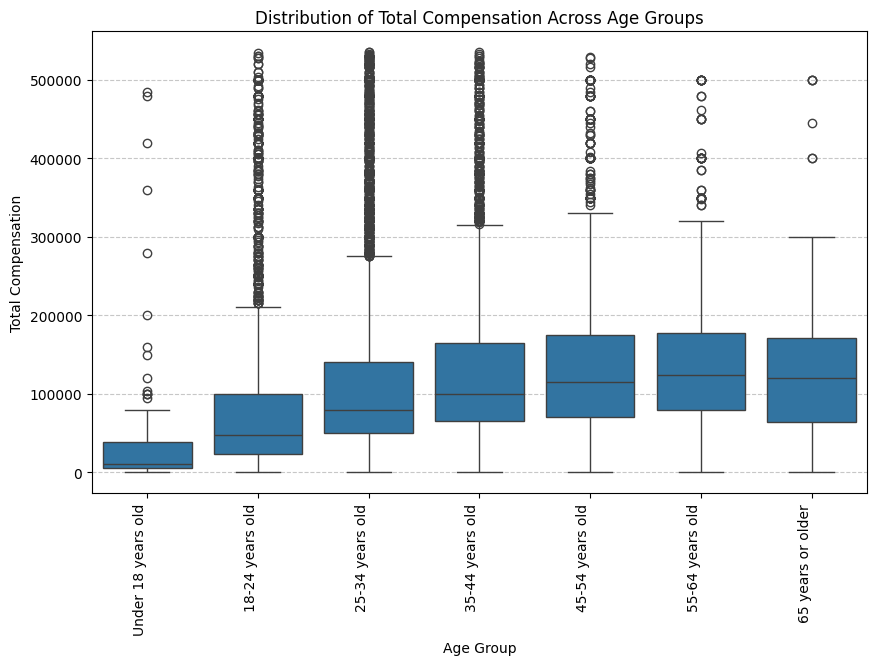

In [26]:
#Ensure 'Age' is treated as a categorical variable and ordered if desired
#For example, if you want a specific order for age groups:
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

#Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='CompTotal', data=df_cleaned2)
plt.title('Distribution of Total Compensation Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, ha='right')
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [27]:
QUERY = """
SELECT CompTotal, JobSatPoints_6 FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)


       CompTotal  JobSatPoints_6
0            NaN             NaN
1            NaN             0.0
2            NaN             NaN
3            NaN             NaN
4            NaN             NaN
...          ...             ...
65432        NaN             NaN
65433        NaN             NaN
65434        NaN             NaN
65435        NaN             0.0
65436        NaN             NaN

[65437 rows x 2 columns]


In [29]:
#check unique value
print('\nThere are', df['CompTotal'].nunique(), 'unique CompTotal values in the survey:')
print(df['CompTotal'].value_counts())

#check unique value
print('\nThere are', df['JobSatPoints_6'].nunique(), 'unique JobSatPoints_6 values in the survey:')
print(df['JobSatPoints_6'].value_counts())


There are 3337 unique CompTotal values in the survey:
CompTotal
100000.0    939
60000.0     839
120000.0    793
80000.0     728
50000.0     705
           ... 
201600.0      1
1100.0        1
133600.0      1
301210.0      1
81920.0       1
Name: count, Length: 3337, dtype: int64

There are 93 unique JobSatPoints_6 values in the survey:
JobSatPoints_6
0.0     7912
20.0    4352
10.0    3328
30.0    2482
15.0    1466
        ... 
48.0       1
44.0       1
64.0       1
54.0       1
63.0       1
Name: count, Length: 93, dtype: int64


In [31]:
max_CompTotal = df['JobSatPoints_6'].max()
print(max_CompTotal)

min_CompTotal = df['JobSatPoints_6'].min()
print(min_CompTotal) 

100.0
0.0


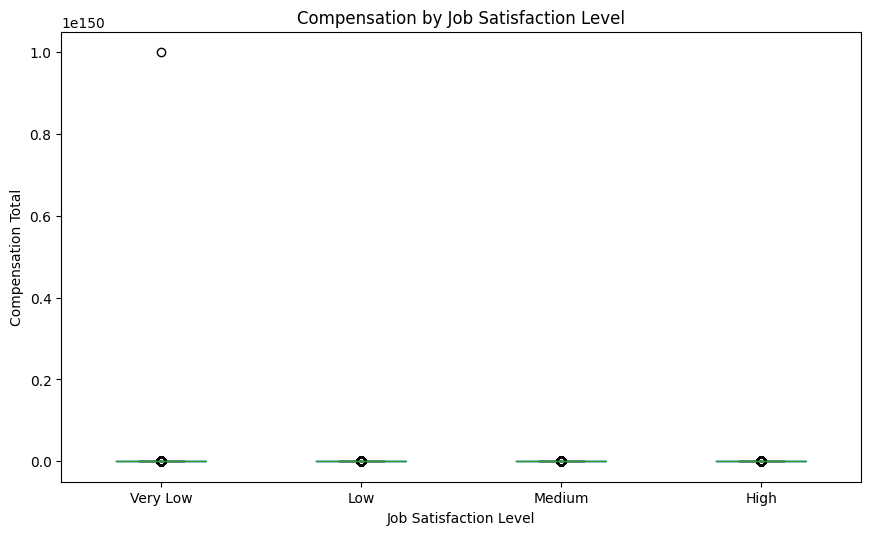

In [32]:
#define the bins and labels
bins = [0, 25, 50, 75, 100]
labels = ['Very Low', 'Low', 'Medium', 'High']

#create the new categorical column
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, right=True, include_lowest=True)

#to ensure a specific order in the plot, convert the new column to a Categorical type with ordered categories
df['JobSatCategory'] = pd.Series(df['JobSatCategory'], dtype="category").cat.reorder_categories(labels, ordered=True)

#generate the box plot
df.boxplot(column='CompTotal', by='JobSatCategory', figsize=(10, 6), grid=False)
plt.title('Compensation by Job Satisfaction Level')
plt.suptitle('') # Suppress the default 'Boxplot grouped by JobSatCategory' title
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Compensation (CompTotal)')
plt.show()

In [33]:
#calculate Q1 and Q3
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#create a new DataFrame without outliers
df_cleaned3 = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

print("\nCleaned DataFrame (outliers removed from CompTotal):")
print(df_cleaned3)


Cleaned DataFrame (outliers removed from CompTotal):
       CompTotal  JobSatPoints_6 JobSatCategory
374      28000.0             NaN            NaN
379      85000.0             0.0       Very Low
385      50000.0             NaN            NaN
389     110000.0            20.0       Very Low
392     126420.0            30.0            Low
...          ...             ...            ...
65396    36000.0             NaN            NaN
65401    40000.0             NaN            NaN
65408    61000.0             NaN            NaN
65412    58000.0             NaN            NaN
65431    55000.0             NaN            NaN

[27864 rows x 3 columns]


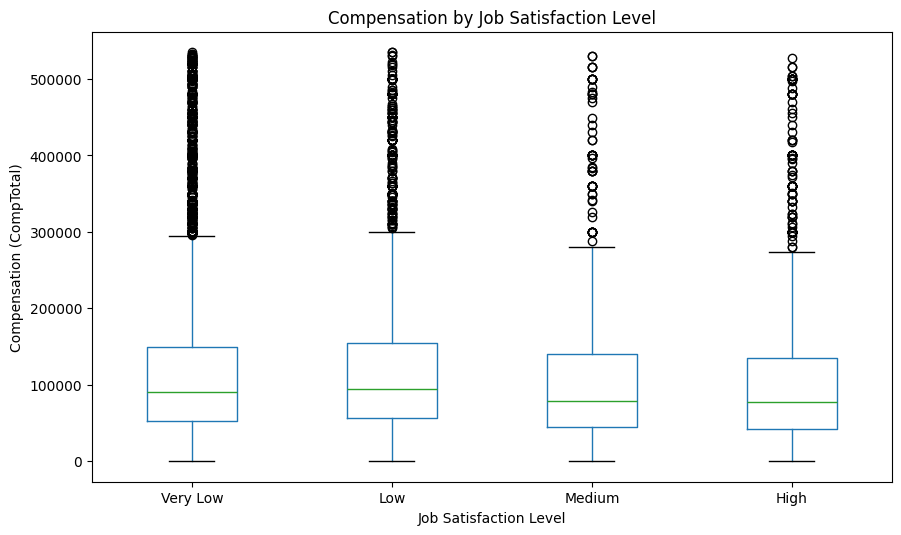

In [36]:
#define the bins and labels
bins = [0, 25, 50, 75, 100]
labels = ['Very Low', 'Low', 'Medium', 'High']

#create the new categorical column
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, right=True, include_lowest=True)

#to ensure a specific order in the plot, convert the new column to a Categorical type with ordered categories
df['JobSatCategory'] = pd.Series(df['JobSatCategory'], dtype="category").cat.reorder_categories(labels, ordered=True)

#generate the box plot
df_cleaned3.boxplot(column='CompTotal', by='JobSatCategory', figsize=(10, 6), grid=False)
plt.title('Compensation by Job Satisfaction Level')
plt.suptitle('') # Suppress the default 'Boxplot grouped by JobSatCategory' title
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Compensation (CompTotal)')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [37]:
QUERY = """
SELECT ConvertedCompYearly, DevType FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)

       ConvertedCompYearly                DevType
0                      NaN                   None
1                      NaN  Developer, full-stack
2                      NaN   Developer Experience
3                      NaN  Developer, full-stack
4                      NaN  Developer, full-stack
...                    ...                    ...
65432                  NaN             Blockchain
65433                  NaN                   None
65434                  NaN      Developer, mobile
65435                  NaN    Developer, back-end
65436                  NaN                   None

[65437 rows x 2 columns]


In [41]:
#check unique value
print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique ConvertedCompYearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())

#check unique value
print('\nThere are', df['DevType'].nunique(), 'unique DevType values in the survey:')
print(df['DevType'].value_counts())


There are 6113 unique ConvertedCompYearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64

There are 34 unique DevType values in the survey:
DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning 

/tmp/ipykernel_301/831367310.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5['DevType'] = pd.Categorical(df_top_5['DevType'], categories=top_5_devtypes, ordered=True)


<Figure size 1000x600 with 0 Axes>

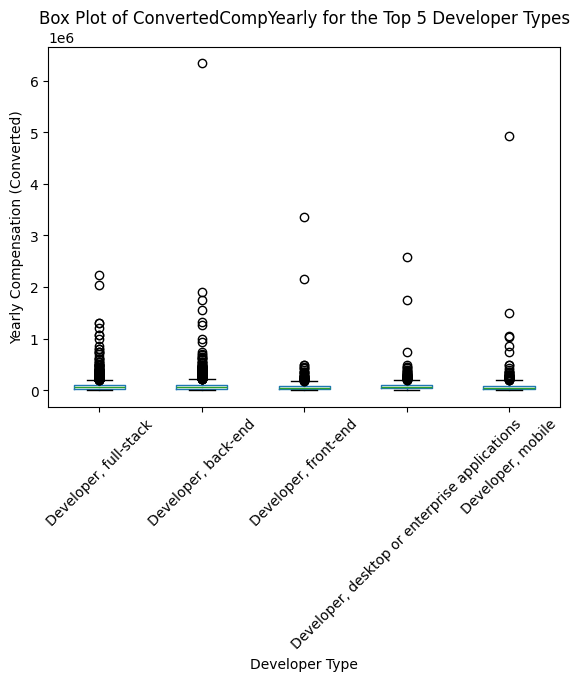

In [43]:
# 1. Handle missing values in the relevant columns if necessary
df_plot = df.dropna(subset=['DevType', 'ConvertedCompYearly'])

# 2. Identify the top 5 most frequent 'DevType' values
top_5_devtypes = df_plot['DevType'].value_counts().nlargest(5).index

# 3. Filter the DataFrame to include only the top 5 'DevType'
df_top_5 = df_plot[df_plot['DevType'].isin(top_5_devtypes)]

# Optional: Ensure 'DevType' is a categorical type for correct plotting order
# and set the order to match the top 5 list to ensure consistent ordering in the plot
df_top_5['DevType'] = pd.Categorical(df_top_5['DevType'], categories=top_5_devtypes, ordered=True)

# 4. Create the box plot using pandas' built-in plotting function (which uses matplotlib)
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
df_top_5.boxplot(column='ConvertedCompYearly', by='DevType', grid=False, rot=45) #

plt.title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types')
plt.suptitle('') # Suppress the default pandas suptitle
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (Converted)')
plt.show()

In [44]:
#calculate Q1 and Q3
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#create a new DataFrame without outliers
df_cleaned4 = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print("\nCleaned DataFrame (outliers removed from ConvertedCompYearly):")
print(df_cleaned4)


Cleaned DataFrame (outliers removed from ConvertedCompYearly):
       ConvertedCompYearly                                        DevType
72                  7322.0  Data scientist or machine learning specialist
374                30074.0                            Academic researcher
379                91295.0  Data scientist or machine learning specialist
385                53703.0                            Developer, back-end
389               110000.0                                        Student
...                    ...                                            ...
41179              15600.0                            Developer, back-end
41180              44640.0    Developer, embedded applications or devices
41184             170000.0                                Project manager
41185             116844.0                          Developer, full-stack
41186              12000.0                          Developer, full-stack

[22457 rows x 2 columns]


/tmp/ipykernel_301/591106770.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5a['DevType'] = pd.Categorical(df_top_5a['DevType'], categories=top_5_devtypes1, ordered=True)


<Figure size 1000x600 with 0 Axes>

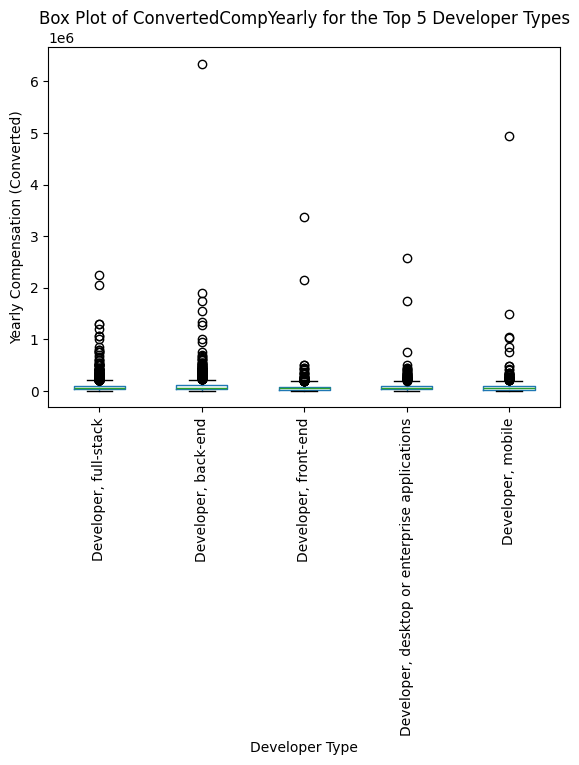

In [49]:
# 1. Handle missing values in the relevant columns if necessary
df_cleaned4 = df.dropna(subset=['DevType', 'ConvertedCompYearly'])

# 2. Identify the top 5 most frequent 'DevType' values
top_5_devtypes1 = df_cleaned4['DevType'].value_counts().nlargest(5).index

# 3. Filter the DataFrame to include only the top 5 'DevType'
df_top_5a = df_cleaned4[df_cleaned4['DevType'].isin(top_5_devtypes1)]

# Optional: Ensure 'DevType' is a categorical type for correct plotting order
# and set the order to match the top 5 list to ensure consistent ordering in the plot
df_top_5a['DevType'] = pd.Categorical(df_top_5a['DevType'], categories=top_5_devtypes1, ordered=True)

# 4. Create the box plot using pandas' built-in plotting function (which uses matplotlib)
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
df_top_5a.boxplot(column='ConvertedCompYearly', by='DevType', grid=False, rot=90) #

plt.title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types')
plt.suptitle('') # Suppress the default pandas suptitle
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation (Converted)')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [50]:
QUERY = """
SELECT CompTotal, Country FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)

       CompTotal                                            Country
0            NaN                           United States of America
1            NaN  United Kingdom of Great Britain and Northern I...
2            NaN  United Kingdom of Great Britain and Northern I...
3            NaN                                             Canada
4            NaN                                             Norway
...          ...                                                ...
65432        NaN                                               None
65433        NaN                                               None
65434        NaN                                               None
65435        NaN                                            Germany
65436        NaN                                               None

[65437 rows x 2 columns]


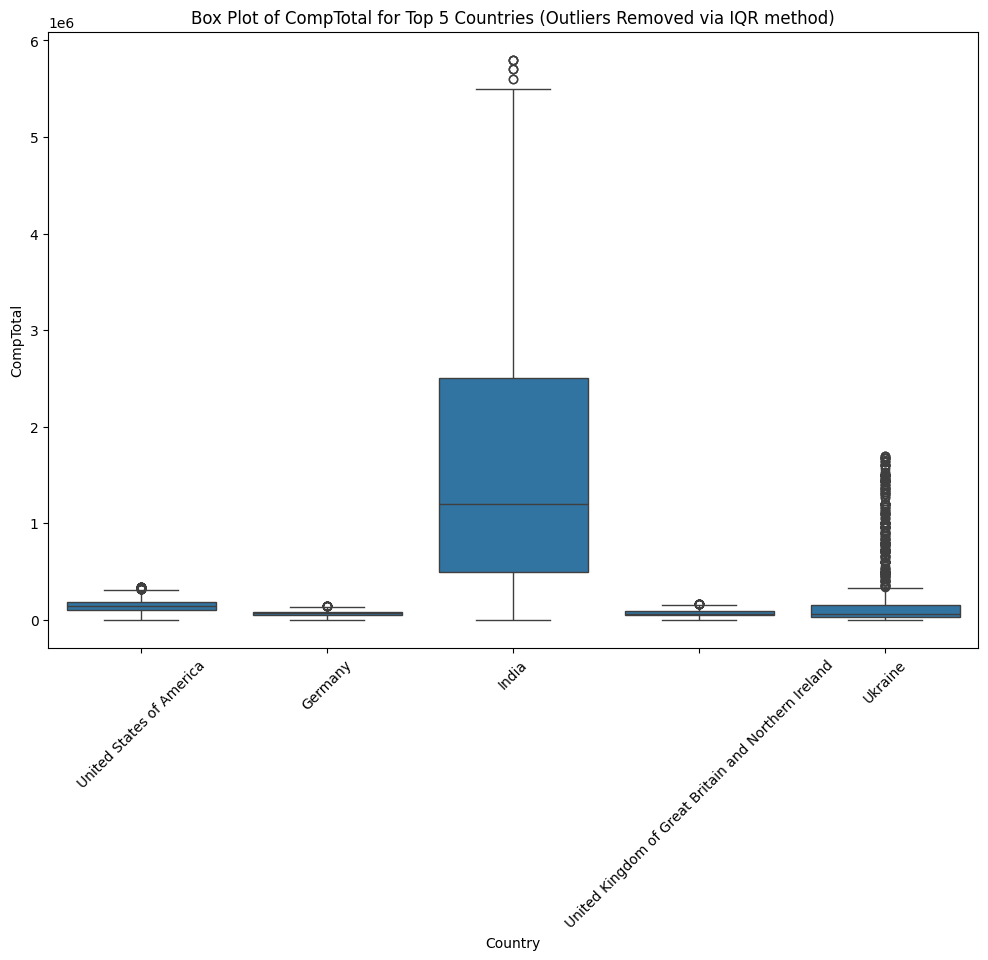

In [51]:
# 1. Identify the top 5 countries based on the frequency (or some other metric)
top_5_countries = df['Country'].value_counts().head(5).index.tolist()

# 2. Filter the DataFrame to include only the top 5 countries
df_top5 = df[df['Country'].isin(top_5_countries)].copy()

# Ensure 'CompTotal' is numeric and handle NaNs if necessary
df_top5['CompTotal'] = pd.to_numeric(df_top5['CompTotal'], errors='coerce')
df_top5.dropna(subset=['CompTotal'], inplace=True)

# 3. Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df_group, column):
    Q1 = df_group[column].quantile(0.25)
    Q3 = df_group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers
    df_cleaned = df_group[(df_group[column] >= lower_bound) & (df_group[column] <= upper_bound)]
    return df_cleaned

# 4. Apply the outlier removal function to each country group
df_cleaned_list = []
for country in top_5_countries:
    df_country = df_top5[df_top5['Country'] == country]
    df_cleaned_country = remove_outliers_iqr(df_country, 'CompTotal')
    df_cleaned_list.append(df_cleaned_country)

df_cleaned = pd.concat(df_cleaned_list)

# 5. Create the box plot using the cleaned data
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_cleaned, order=top_5_countries)
plt.title('Box Plot of CompTotal for Top 5 Countries (Outliers Removed via IQR method)')
plt.xlabel('Country')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [52]:
QUERY = """
SELECT CompTotal, Employment FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)

       CompTotal           Employment
0            NaN  Employed, full-time
1            NaN  Employed, full-time
2            NaN  Employed, full-time
3            NaN   Student, full-time
4            NaN   Student, full-time
...          ...                  ...
65432        NaN  Employed, full-time
65433        NaN  Employed, full-time
65434        NaN  Employed, full-time
65435        NaN  Employed, full-time
65436        NaN   Student, full-time

[65437 rows x 2 columns]


In [57]:
#check unique value
print('\nThere are', df['Employment'].nunique(), 'unique Employment values in the survey:')
print(df['Employment'].value_counts())


There are 110 unique Employment values in the survey:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ... 

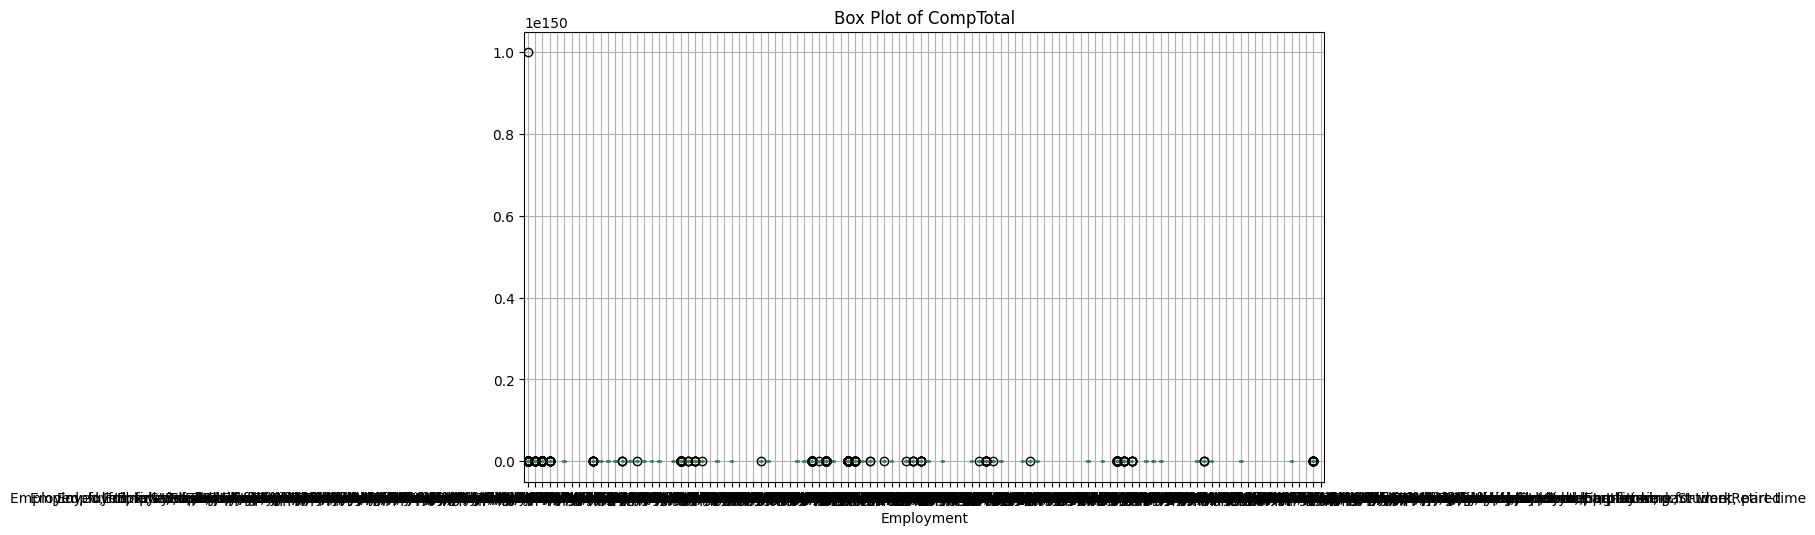

In [55]:
# 1. Define a function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df, column_name, group_by_column=None):
    if group_by_column:
        # Group by the specified column and calculate Q1, Q3, and IQR for each group
        Q1 = df.groupby(group_by_column)[column_name].transform(lambda x: x.quantile(0.25))
        Q3 = df.groupby(group_by_column)[column_name].transform(lambda x: x.quantile(0.75))
    else:
        # Calculate Q1, Q3, and IQR for the entire column
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers
    # The tilde (~) inverts the boolean mask
    cleaned_df = df[
        (df[column_name] >= lower_bound) & 
        (df[column_name] <= upper_bound)
    ]
    return cleaned_df

# 2. Apply the function to the DataFrame
# Note: This removes outliers based on the distribution within *each* employment type group
df_cleaned = remove_outliers_iqr(df, 'CompTotal', 'Employment')

# 3. Create the box plot using the cleaned DataFrame
df.boxplot(column='CompTotal', by='Employment', figsize=(10, 6))
plt.title('Box Plot of CompTotal')
plt.suptitle('') # Suppress the default pandas title
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [58]:
QUERY = """
SELECT YearsCodePro, JobSatPoints_6 FROM main
"""
df = pd.read_sql_query(QUERY, conn)
print(df)

      YearsCodePro  JobSatPoints_6
0             None             NaN
1               17             0.0
2               27             NaN
3             None             NaN
4             None             NaN
...            ...             ...
65432            3             NaN
65433         None             NaN
65434            5             NaN
65435            2             0.0
65436         None             NaN

[65437 rows x 2 columns]


In [59]:
#check unique value
print('\nThere are', df['YearsCodePro'].nunique(), 'unique YearsCodePro values in the survey:')
print(df['YearsCodePro'].value_counts())

print('\nThere are', df['JobSatPoints_6'].nunique(), 'unique JobSatPoints_6 values in the survey:')
print(df['JobSatPoints_6'].value_counts())


There are 52 unique YearsCodePro values in the survey:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34           

In [60]:
#replace Less than 1 year with 0.5 year & More than 50 years with 55 years
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '55'})

#check after replacement
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2      4168
3      4093
5      3526
10     3251
4      3215
0.5    2856
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
55       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64


In [61]:
#convert column to numeric
# non-convertible values (like NaNs in a different format) into NaN (Not a Number).
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#drop NaN value
df_cleaned = df.dropna(subset=['YearsCodePro_numeric'])

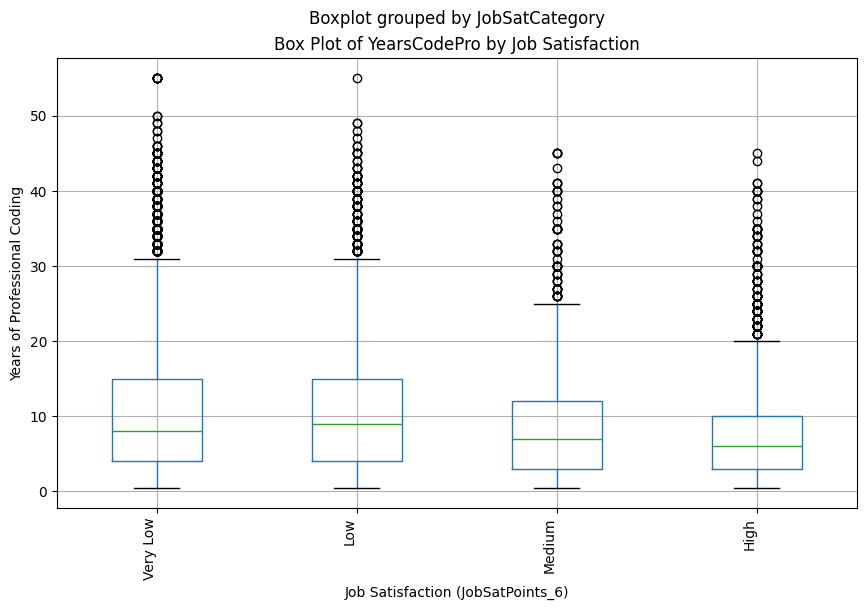

In [64]:
#define the bins and labels
bins = [0, 25, 50, 75, 100]
labels = ['Very Low', 'Low', 'Medium', 'High']

#create the new categorical column
df['JobSatCategory'] = pd.cut(df['JobSatPoints_6'], bins=bins, labels=labels, right=True, include_lowest=True)

#to ensure a specific order in the plot, convert the new column to a Categorical type with ordered categories
df['JobSatCategory'] = pd.Series(df['JobSatCategory'], dtype="category").cat.reorder_categories(labels, ordered=True)

df.boxplot(column='YearsCodePro_numeric', by='JobSatCategory', grid=True, figsize=(10, 6))
plt.title('Box Plot of YearsCodePro by Job Satisfaction')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding')
plt.xticks(rotation=90, ha='right')

plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [65]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
